In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install opencv-python
# import tensorflow_datasets as tfds
path = 'C:/Users/Raffiudin/brain_tumor_dataset/'


data = tf.keras.utils.image_dataset_from_directory(
    path,
    seed=123,
    image_size=(224, 224),
    validation_split = 0.33,
    batch_size=32, subset = 'both'
)
training = data[0]
validation = data[1]

Found 253 files belonging to 2 classes.
Using 170 files for training.
Using 83 files for validation.


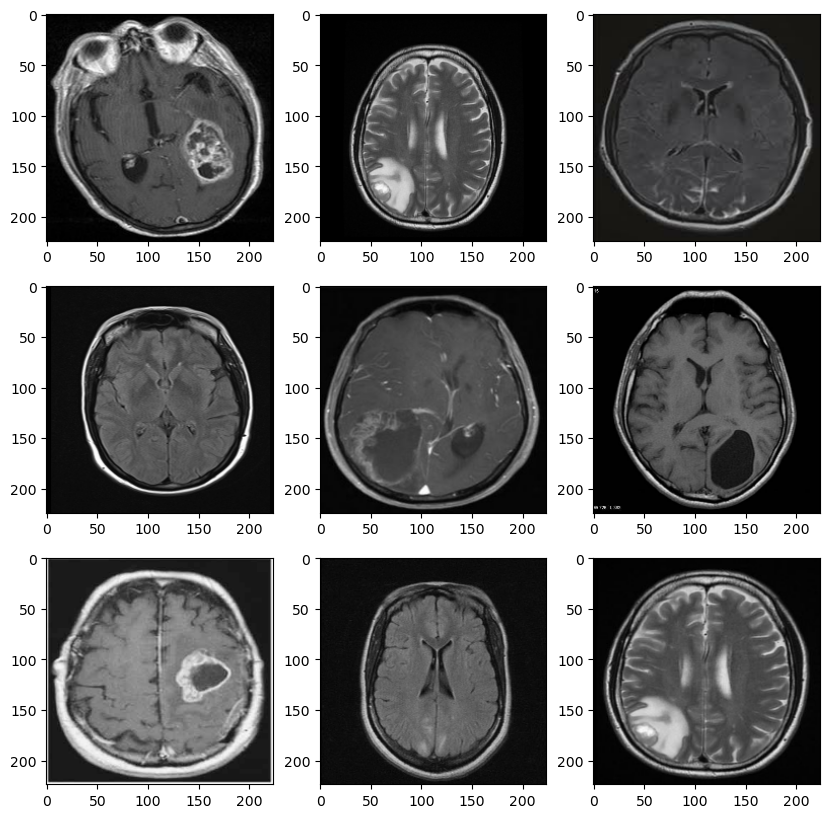

In [3]:
# class_names = training.classes
images1 = []
plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        x = images[i].numpy().astype("uint8")
        images1.append(x)
        plt.imshow(x)
        plt.axis("on")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


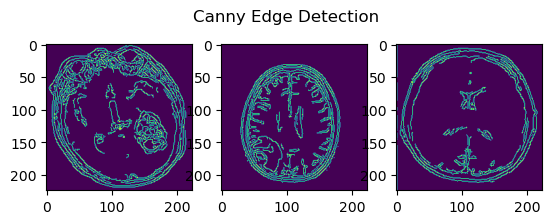

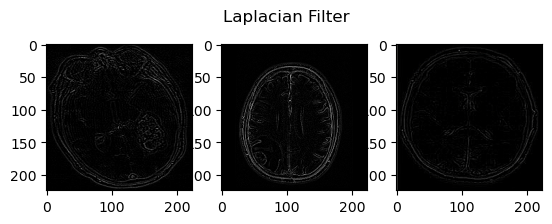

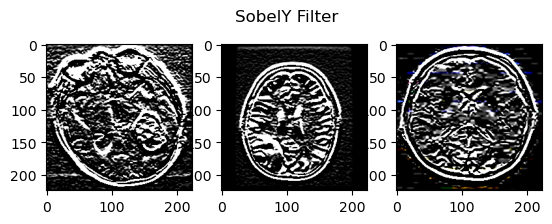

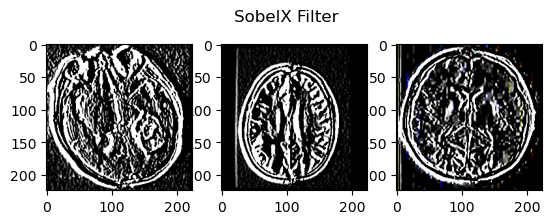

In [4]:
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    edges = cv.Canny(images1[j],100,200)

    ax1.imshow(edges)

fig.suptitle('Canny Edge Detection') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)



fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    laplacian = cv.Laplacian(images1[j],cv.CV_16S)
    ax1.imshow(laplacian)

fig.suptitle('Laplacian Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    sobely = cv.Sobel(images1[j],cv.CV_16S,0,1,ksize=5)
    ax1.imshow(sobely)

fig.suptitle('SobelY Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)
fig = plt.figure()
for j in range(3):
    ax1 = fig.add_subplot(1,3, j + 1)
    sobelx = cv.Sobel(images1[j],cv.CV_16S,1,0,ksize=5)
    ax1.imshow(sobelx)

fig.suptitle('SobelX Filter') # or plt.suptitle('Main title')
fig.subplots_adjust(top=1.4)




## Training the model

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model
model1 = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model1.build(input_shape=(32, 224,224,3))

# Compile the model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Print the model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 128)         7

In [6]:
epochs = 20

history1 = model1.fit(training, validation_data=validation, epochs=epochs)

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 0.8730 - accuracy: 0.6647 - val_loss: 0.5763 - val_accuracy: 0.7349
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 0.4898 - accuracy: 0.7588 - val_loss: 0.6240 - val_accuracy: 0.7831
Epoch 3/20
6/6 [==============================] - 9s 2s/step - loss: 0.4180 - accuracy: 0.8353 - val_loss: 0.6029 - val_accuracy: 0.7952
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.3691 - accuracy: 0.8588 - val_loss: 0.5376 - val_accuracy: 0.8072
Epoch 5/20
6/6 [==============================] - 9s 1s/step - loss: 0.2896 - accuracy: 0.8882 - val_loss: 0.5634 - val_accuracy: 0.7711
Epoch 6/20
6/6 [==============================] - 10s 2s/step - loss: 0.1883 - accuracy: 0.9353 - val_loss: 0.5376 - val_accuracy: 0.8434
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 0.1309 - accuracy: 0.9588 - val_loss: 0.7071 - val_accuracy: 0.8193
Epoch 8/20
6/6 [=======================

Text(0.5, 0, 'Epoch')

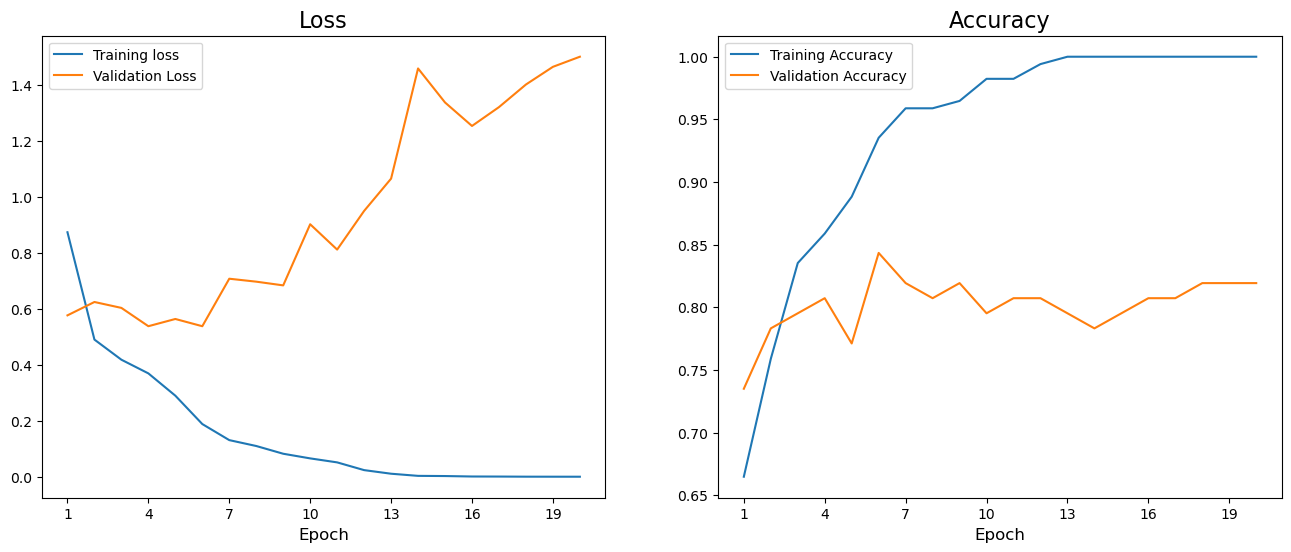

In [7]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

ax1.plot(range(1,epochs+1), history1.history['loss'], label='Training loss')
ax1.plot(range(1,epochs+1), history1.history['val_loss'], label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1,epochs+1,3))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1,epochs+1), history1.history['accuracy'], label='Training Accuracy')
ax2.plot(range(1,epochs+1), history1.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1,epochs+1,3))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize)

## Handling Overfitting

In [8]:
data_augmentation = tf.keras.Sequential(
  [layers.RandomFlip("horizontal",
                      input_shape=(224,224,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),])

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(2, activation='softmax')
])
model.build(input_shape=(32, 224,224,3))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [10]:
epochs = 20

history = model.fit(training, validation_data=validation, epochs=epochs)

Epoch 1/20
6/6 [==============================] - 12s 2s/step - loss: 0.8462 - accuracy: 0.5353 - val_loss: 0.6090 - val_accuracy: 0.6265
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 0.5823 - accuracy: 0.6882 - val_loss: 0.5721 - val_accuracy: 0.7470
Epoch 3/20
6/6 [==============================] - 10s 2s/step - loss: 0.5365 - accuracy: 0.7588 - val_loss: 0.6241 - val_accuracy: 0.7349
Epoch 4/20
6/6 [==============================] - 10s 2s/step - loss: 0.5999 - accuracy: 0.7118 - val_loss: 0.5704 - val_accuracy: 0.7711
Epoch 5/20
6/6 [==============================] - 9s 1s/step - loss: 0.5151 - accuracy: 0.7235 - val_loss: 0.5883 - val_accuracy: 0.7108
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.5446 - accuracy: 0.7706 - val_loss: 0.5726 - val_accuracy: 0.7711
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 0.5362 - accuracy: 0.7588 - val_loss: 0.6951 - val_accuracy: 0.7711
Epoch 8/20
6/6 [====================

Text(0.5, 0, 'Epoch')

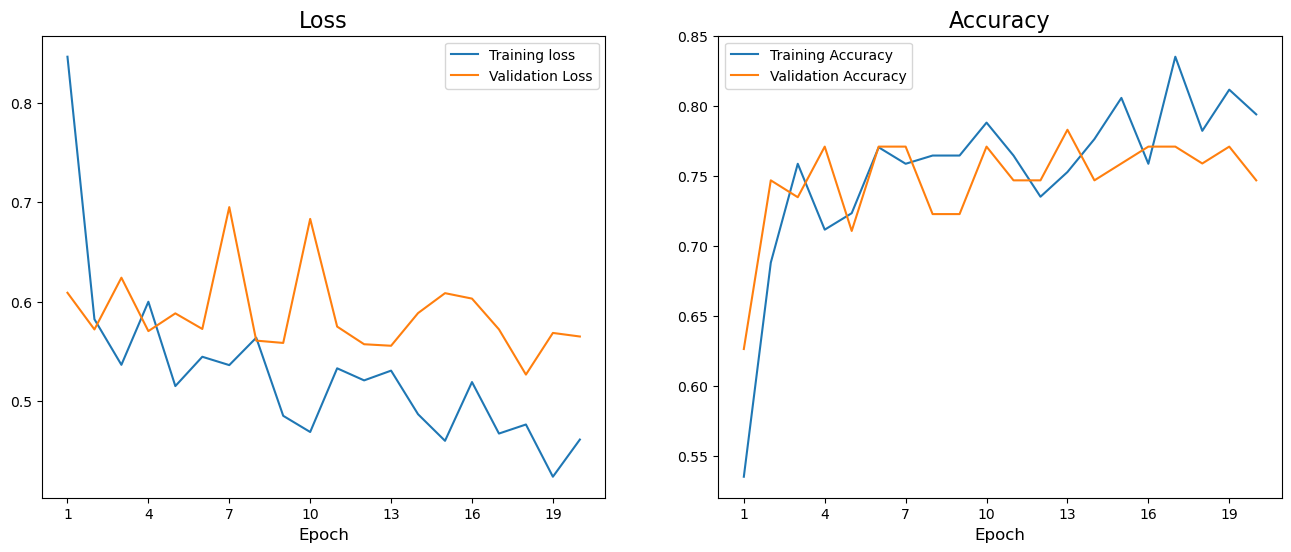

In [11]:
epochs=20

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
title_fontsize = 16
axis_fontsize = 12

ax1.plot(range(1,epochs+1), history.history['loss'], label='Training loss')
ax1.plot(range(1,epochs+1), history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax1.set_xticks(range(1,epochs+1,3))
ax1.set_title('Loss', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=axis_fontsize)

ax2.plot(range(1,epochs+1), history.history['accuracy'], label='Training Accuracy')
ax2.plot(range(1,epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()
ax2.set_xticks(range(1,epochs+1,3))
ax2.set_title('Accuracy', fontsize=title_fontsize)
ax2.set_xlabel('Epoch', fontsize=axis_fontsize)